In [1]:
# %pip install bs4
# %pip install selenium


In [2]:
import pandas as pd
import numpy as np
import requests
import bs4
import re
# import ChromeDriver

from bs4 import BeautifulSoup
from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

import seaborn as sns


# Data

In [3]:
beer = pd.read_csv('sapporo.csv')
beer

,Zip Codes,Retail Accounts,Address,City,State,1 Year 1/1/2022 thru 12/31/2022 Case Equivs,1 Year 1/1/2021 thru 12/31/2021 Case Equivs,Diff Case Equivs,Pct Case Equivs,1 Year 1/1/2021 thru 12/31/2021 Case Equivs.1,1 Year 1/1/2020 thru 12/31/2020 Case Equivs,Diff Case Equivs.1,Pct Case Equivs.1,1 Year 1/1/2019 thru 12/31/2019 Case Equivs,1 Year 1/1/2018 thru 12/31/2018 Case Equivs,Diff Case Equivs.2,Pct Case Equivs.2
0,10034,FLAIR BEVERAGES,3857 9TH AVE,NEW YORK,NY,9478.066027,11594.383700,-2116.317675,-0.182529553,11594.383700,10521.527590,1072.856117,0.101967714,8598.357963,8459.114783,139.243180,0.016460727
1,10034,FINE FARE SUPERMARKET #970040,4776 BROADWAY,NEW YORK,NY,50.974560,55.397895,-4.423335,-0.079846626,55.397895,34.321180,21.076715,0.614102283,38.660640,36.814960,1.845680,0.050133967
2,10034,PARK TERRACE FOOD,510 W 218TH ST,NEW YORK,NY,62.203614,41.196692,21.006922,0.50991769,41.196692,49.410665,-8.213973,-0.166238868,37.491240,49.734715,-12.243475,-0.246175634
3,10034,WILLIAM GROCERY,257 259 DYCKMAN ST,NEW YORK,NY,69.050945,35.575115,33.475830,0.940990071,35.575115,9.242485,26.332630,2.8490855,28.389645,17.400105,10.989540,0.631578947
4,10034,JOCHY CAFE CORP,135 SHERMAN AVE,NEW YORK,NY,5.494771,29.150463,-23.655692,-0.811503131,29.150463,24.247436,4.903027,0.20220806,37.406704,9.496090,27.910614,2.939169069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,14870,A & A FOODMART,523 E HIGH ST,PAINTED POST,NY,1.000330,0.000000,1.000330,--,0.000000,0.000000,0.000000,--,0.000000,0.000000,0.000000,--
6535,10519,CROTON FALLS GASOLINE MART,590 RTE 22,CROTON FALLS,NY,0.000000,0.000000,0.000000,--,0.000000,0.000000,0.000000,--,2.831920,7.495430,-4.663510,-0.622180449
6536,13036,RED ONION GENERAL STORE,20 COUNTY ROUTE 33,CENTRAL SQUARE,NY,1.000000,0.000000,1.000000,--,0.000000,0.000000,0.000000,--,0.000000,0.000000,0.000000,--
6537,12885,ASHES HOTEL,85 HUDSON ST,WARRENSBURG,NY,0.000000,0.000000,0.000000,--,0.000000,1.000330,-1.000330,-1,0.000000,0.000000,0.000000,--


In [4]:
beer.head()

,Zip Codes,Retail Accounts,Address,City,State,1 Year 1/1/2022 thru 12/31/2022 Case Equivs,1 Year 1/1/2021 thru 12/31/2021 Case Equivs,Diff Case Equivs,Pct Case Equivs,1 Year 1/1/2021 thru 12/31/2021 Case Equivs.1,1 Year 1/1/2020 thru 12/31/2020 Case Equivs,Diff Case Equivs.1,Pct Case Equivs.1,1 Year 1/1/2019 thru 12/31/2019 Case Equivs,1 Year 1/1/2018 thru 12/31/2018 Case Equivs,Diff Case Equivs.2,Pct Case Equivs.2
0,10034,FLAIR BEVERAGES,3857 9TH AVE,NEW YORK,NY,9478.066027,11594.383700,-2116.317675,-0.182529553,11594.383700,10521.527590,1072.856117,0.101967714,8598.357963,8459.114783,139.243180,0.016460727
1,10034,FINE FARE SUPERMARKET #970040,4776 BROADWAY,NEW YORK,NY,50.974560,55.397895,-4.423335,-0.079846626,55.397895,34.321180,21.076715,0.614102283,38.660640,36.814960,1.845680,0.050133967
2,10034,PARK TERRACE FOOD,510 W 218TH ST,NEW YORK,NY,62.203614,41.196692,21.006922,0.50991769,41.196692,49.410665,-8.213973,-0.166238868,37.491240,49.734715,-12.243475,-0.246175634
3,10034,WILLIAM GROCERY,257 259 DYCKMAN ST,NEW YORK,NY,69.050945,35.575115,33.475830,0.940990071,35.575115,9.242485,26.332630,2.8490855,28.389645,17.400105,10.989540,0.631578947
4,10034,JOCHY CAFE CORP,135 SHERMAN AVE,NEW YORK,NY,5.494771,29.150463,-23.655692,-0.811503131,29.150463,24.247436,4.903027,0.20220806,37.406704,9.496090,27.910614,2.939169069


In [5]:
beer.columns

Index(['Zip Codes', 'Retail Accounts', 'Address', 'City', 'State',
       '1 Year 1/1/2022 thru 12/31/2022  Case Equivs',
       '1 Year 1/1/2021 thru 12/31/2021  Case Equivs', 'Diff  Case Equivs',
       'Pct  Case Equivs', '1 Year 1/1/2021 thru 12/31/2021  Case Equivs.1',
       '1 Year 1/1/2020 thru 12/31/2020  Case Equivs', 'Diff  Case Equivs.1',
       'Pct  Case Equivs.1', '1 Year 1/1/2019 thru 12/31/2019  Case Equivs',
       '1 Year 1/1/2018 thru 12/31/2018  Case Equivs', 'Diff  Case Equivs.2',
       'Pct  Case Equivs.2'],
      dtype='object')

In [6]:
a = beer[(beer['1 Year 1/1/2022 thru 12/31/2022  Case Equivs'] < 1000) & (beer['1 Year 1/1/2022 thru 12/31/2022  Case Equivs'] > 0)]



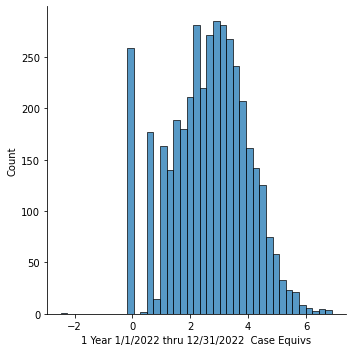

In [7]:
sns.displot(np.log(a['1 Year 1/1/2022 thru 12/31/2022  Case Equivs']))

In [8]:
beer.isna().sum()

Zip Codes                                         0
Retail Accounts                                   0
Address                                           0
City                                              0
State                                             0
1 Year 1/1/2022 thru 12/31/2022  Case Equivs      0
1 Year 1/1/2021 thru 12/31/2021  Case Equivs      0
Diff  Case Equivs                                 0
Pct  Case Equivs                                  0
1 Year 1/1/2021 thru 12/31/2021  Case Equivs.1    0
1 Year 1/1/2020 thru 12/31/2020  Case Equivs      0
Diff  Case Equivs.1                               0
Pct  Case Equivs.1                                0
1 Year 1/1/2019 thru 12/31/2019  Case Equivs      0
1 Year 1/1/2018 thru 12/31/2018  Case Equivs      0
Diff  Case Equivs.2                               0
Pct  Case Equivs.2                                0
dtype: int64

In [9]:
beer.describe()

,Zip Codes,1 Year 1/1/2022 thru 12/31/2022 Case Equivs,1 Year 1/1/2021 thru 12/31/2021 Case Equivs,Diff Case Equivs,1 Year 1/1/2021 thru 12/31/2021 Case Equivs.1,1 Year 1/1/2020 thru 12/31/2020 Case Equivs,Diff Case Equivs.1,1 Year 1/1/2019 thru 12/31/2019 Case Equivs,1 Year 1/1/2018 thru 12/31/2018 Case Equivs,Diff Case Equivs.2
count,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000
mean,11283.406331,26.391808,30.412352,-4.020544,30.412352,26.194549,4.217803,28.068336,26.587102,1.481234
std,1102.016539,192.491190,227.949610,54.614938,227.949610,185.231544,72.654233,206.101270,202.376928,65.411321
min,5403.000000,-9.993931,-4.578976,-2116.317675,-4.578976,-32.874722,-1411.803802,-13.995250,-3.578646,-2330.303792
25%,10462.000000,0.000000,0.000000,-5.494770,0.000000,0.000000,-2.747385,0.000000,0.000000,-1.831590
50%,11216.000000,4.578975,4.578975,0.000000,4.578975,4.696388,0.000000,4.578975,3.663181,0.000000
75%,11726.000000,21.063287,23.810670,1.590479,23.810670,22.228004,4.578975,21.979080,19.083761,4.240834
max,14905.000000,9478.066027,11594.383700,1607.393991,11594.383700,10521.527590,3632.118124,9552.320551,8735.853932,1237.367308


## Change column names:

In [10]:
beer.columns

Index(['Zip Codes', 'Retail Accounts', 'Address', 'City', 'State',
       '1 Year 1/1/2022 thru 12/31/2022  Case Equivs',
       '1 Year 1/1/2021 thru 12/31/2021  Case Equivs', 'Diff  Case Equivs',
       'Pct  Case Equivs', '1 Year 1/1/2021 thru 12/31/2021  Case Equivs.1',
       '1 Year 1/1/2020 thru 12/31/2020  Case Equivs', 'Diff  Case Equivs.1',
       'Pct  Case Equivs.1', '1 Year 1/1/2019 thru 12/31/2019  Case Equivs',
       '1 Year 1/1/2018 thru 12/31/2018  Case Equivs', 'Diff  Case Equivs.2',
       'Pct  Case Equivs.2'],
      dtype='object')

In [11]:
# rename all year to year counts:
# rename all difference between years columns:
beer.rename(columns = {'1 Year 1/1/2022 thru 12/31/2022  Case Equivs':'Year 2022',
                      '1 Year 1/1/2021 thru 12/31/2021  Case Equivs':'Year 2021',
                      'Diff  Case Equivs':'Delta 22/21',
                      '1 Year 1/1/2020 thru 12/31/2020  Case Equivs':'Year 2020',
                      'Diff  Case Equivs.1':'Delta 21/20',
                      '1 Year 1/1/2019 thru 12/31/2019  Case Equivs':'Year 2019',
                      '1 Year 1/1/2018 thru 12/31/2018  Case Equivs':'Year 2018',
                      'Diff  Case Equivs.2': 'Delta 19/18'}, inplace = True)

In [12]:
# rename all percentage change columns:
beer.rename(columns = {'Pct  Case Equivs':'Change Pct 22/21',
                      'Pct  Case Equivs.1':'Change Pct 21/20',
                      'Pct  Case Equivs.2':'Change Pct 19/18'}, inplace = True)

## Drop Duplicate column for year 2021

In [13]:
beer.drop('1 Year 1/1/2021 thru 12/31/2021  Case Equivs.1', axis = 1, inplace = True)

## Add in *Delta* and *Change Pct* columns for years 2020 & 2019

In [14]:
beer['Delta 20/19'] = beer['Year 2020'] - beer['Year 2019']
beer['Change Pct 20/19'] = beer['Delta 20/19'] / beer['Year 2019']

In [15]:
beer.head()

,Zip Codes,Retail Accounts,Address,City,State,Year 2022,Year 2021,Delta 22/21,Change Pct 22/21,Year 2020,Delta 21/20,Change Pct 21/20,Year 2019,Year 2018,Delta 19/18,Change Pct 19/18,Delta 20/19,Change Pct 20/19
0,10034,FLAIR BEVERAGES,3857 9TH AVE,NEW YORK,NY,9478.066027,11594.383700,-2116.317675,-0.182529553,10521.527590,1072.856117,0.101967714,8598.357963,8459.114783,139.243180,0.016460727,1923.169627,0.223667
1,10034,FINE FARE SUPERMARKET #970040,4776 BROADWAY,NEW YORK,NY,50.974560,55.397895,-4.423335,-0.079846626,34.321180,21.076715,0.614102283,38.660640,36.814960,1.845680,0.050133967,-4.339460,-0.112245
2,10034,PARK TERRACE FOOD,510 W 218TH ST,NEW YORK,NY,62.203614,41.196692,21.006922,0.50991769,49.410665,-8.213973,-0.166238868,37.491240,49.734715,-12.243475,-0.246175634,11.919425,0.317926
3,10034,WILLIAM GROCERY,257 259 DYCKMAN ST,NEW YORK,NY,69.050945,35.575115,33.475830,0.940990071,9.242485,26.332630,2.8490855,28.389645,17.400105,10.989540,0.631578947,-19.147160,-0.674442
4,10034,JOCHY CAFE CORP,135 SHERMAN AVE,NEW YORK,NY,5.494771,29.150463,-23.655692,-0.811503131,24.247436,4.903027,0.20220806,37.406704,9.496090,27.910614,2.939169069,-13.159268,-0.351789


## Re-arrange columns in correct order

In [16]:
beer.columns.tolist()

['Zip Codes',
 'Retail Accounts',
 'Address',
 'City',
 'State',
 'Year 2022',
 'Year 2021',
 'Delta 22/21',
 'Change Pct 22/21',
 'Year 2020',
 'Delta 21/20',
 'Change Pct 21/20',
 'Year 2019',
 'Year 2018',
 'Delta 19/18',
 'Change Pct 19/18',
 'Delta 20/19',
 'Change Pct 20/19']

In [17]:
reorder = ['Zip Codes',
 'Retail Accounts',
 'Address',
 'City',
 'State',
 'Year 2022',
 'Year 2021',
 'Delta 22/21',
 'Change Pct 22/21',
 'Year 2020',
 'Delta 21/20',
 'Change Pct 21/20',
 'Year 2019',
 'Delta 20/19',
 'Change Pct 20/19',
 'Year 2018',
 'Delta 19/18',
 'Change Pct 19/18'
 ]

beer = beer[reorder]

In [18]:
beer

,Zip Codes,Retail Accounts,Address,City,State,Year 2022,Year 2021,Delta 22/21,Change Pct 22/21,Year 2020,Delta 21/20,Change Pct 21/20,Year 2019,Delta 20/19,Change Pct 20/19,Year 2018,Delta 19/18,Change Pct 19/18
0,10034,FLAIR BEVERAGES,3857 9TH AVE,NEW YORK,NY,9478.066027,11594.383700,-2116.317675,-0.182529553,10521.527590,1072.856117,0.101967714,8598.357963,1923.169627,0.223667,8459.114783,139.243180,0.016460727
1,10034,FINE FARE SUPERMARKET #970040,4776 BROADWAY,NEW YORK,NY,50.974560,55.397895,-4.423335,-0.079846626,34.321180,21.076715,0.614102283,38.660640,-4.339460,-0.112245,36.814960,1.845680,0.050133967
2,10034,PARK TERRACE FOOD,510 W 218TH ST,NEW YORK,NY,62.203614,41.196692,21.006922,0.50991769,49.410665,-8.213973,-0.166238868,37.491240,11.919425,0.317926,49.734715,-12.243475,-0.246175634
3,10034,WILLIAM GROCERY,257 259 DYCKMAN ST,NEW YORK,NY,69.050945,35.575115,33.475830,0.940990071,9.242485,26.332630,2.8490855,28.389645,-19.147160,-0.674442,17.400105,10.989540,0.631578947
4,10034,JOCHY CAFE CORP,135 SHERMAN AVE,NEW YORK,NY,5.494771,29.150463,-23.655692,-0.811503131,24.247436,4.903027,0.20220806,37.406704,-13.159268,-0.351789,9.496090,27.910614,2.939169069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,14870,A & A FOODMART,523 E HIGH ST,PAINTED POST,NY,1.000330,0.000000,1.000330,--,0.000000,0.000000,--,0.000000,0.000000,NaN,0.000000,0.000000,--
6535,10519,CROTON FALLS GASOLINE MART,590 RTE 22,CROTON FALLS,NY,0.000000,0.000000,0.000000,--,0.000000,0.000000,--,2.831920,-2.831920,-1.000000,7.495430,-4.663510,-0.622180449
6536,13036,RED ONION GENERAL STORE,20 COUNTY ROUTE 33,CENTRAL SQUARE,NY,1.000000,0.000000,1.000000,--,0.000000,0.000000,--,0.000000,0.000000,NaN,0.000000,0.000000,--
6537,12885,ASHES HOTEL,85 HUDSON ST,WARRENSBURG,NY,0.000000,0.000000,0.000000,--,1.000330,-1.000330,-1,0.000000,1.000330,inf,0.000000,0.000000,--


https://google.com/search?q=weather

In [19]:
address = beer[['Retail Accounts','Address']]
address

,Retail Accounts,Address
0,FLAIR BEVERAGES,3857 9TH AVE
1,FINE FARE SUPERMARKET #970040,4776 BROADWAY
2,PARK TERRACE FOOD,510 W 218TH ST
3,WILLIAM GROCERY,257 259 DYCKMAN ST
4,JOCHY CAFE CORP,135 SHERMAN AVE
...,...,...
6534,A & A FOODMART,523 E HIGH ST
6535,CROTON FALLS GASOLINE MART,590 RTE 22
6536,RED ONION GENERAL STORE,20 COUNTY ROUTE 33
6537,ASHES HOTEL,85 HUDSON ST


In [20]:
address['retail'] = address['Retail Accounts'].apply(lambda x: re.sub("[^a-zA-Z0-9]", " ", x,0,re.IGNORECASE))

address['ad'] = address['Address'].apply(lambda x: re.sub("[^a-zA-Z0-9]", " ", x,0,re.IGNORECASE))

address['url_text'] = address['retail'] + ' ' + address['ad']

address


<ipython-input-20-6af1163d8dae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['retail'] = address['Retail Accounts'].apply(lambda x: re.sub("[^a-zA-Z0-9]", " ", x,0,re.IGNORECASE))
<ipython-input-20-6af1163d8dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address['ad'] = address['Address'].apply(lambda x: re.sub("[^a-zA-Z0-9]", " ", x,0,re.IGNORECASE))
<ipython-input-20-6af1163d8dae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Retail Accounts,Address,retail,ad,url_text
0,FLAIR BEVERAGES,3857 9TH AVE,FLAIR BEVERAGES,3857 9TH AVE,FLAIR BEVERAGES 3857 9TH AVE
1,FINE FARE SUPERMARKET #970040,4776 BROADWAY,FINE FARE SUPERMARKET 970040,4776 BROADWAY,FINE FARE SUPERMARKET 970040 4776 BROADWAY
2,PARK TERRACE FOOD,510 W 218TH ST,PARK TERRACE FOOD,510 W 218TH ST,PARK TERRACE FOOD 510 W 218TH ST
3,WILLIAM GROCERY,257 259 DYCKMAN ST,WILLIAM GROCERY,257 259 DYCKMAN ST,WILLIAM GROCERY 257 259 DYCKMAN ST
4,JOCHY CAFE CORP,135 SHERMAN AVE,JOCHY CAFE CORP,135 SHERMAN AVE,JOCHY CAFE CORP 135 SHERMAN AVE
...,...,...,...,...,...
6534,A & A FOODMART,523 E HIGH ST,A A FOODMART,523 E HIGH ST,A A FOODMART 523 E HIGH ST
6535,CROTON FALLS GASOLINE MART,590 RTE 22,CROTON FALLS GASOLINE MART,590 RTE 22,CROTON FALLS GASOLINE MART 590 RTE 22
6536,RED ONION GENERAL STORE,20 COUNTY ROUTE 33,RED ONION GENERAL STORE,20 COUNTY ROUTE 33,RED ONION GENERAL STORE 20 COUNTY ROUTE 33
6537,ASHES HOTEL,85 HUDSON ST,ASHES HOTEL,85 HUDSON ST,ASHES HOTEL 85 HUDSON ST


In [21]:
texts = address['url_text'].tolist()[4229:5015]
texts

['SEDONA TAPHOUSE 640 E BOSTON POST RD',
 'STOP 1 712 OLD WHITE PLAINS RD',
 'BOSTON POST SERVICE STATION 708 E BOSTON POST RD',
 'STOP   SHOP  591 1326 W BOSTON POST RD',
 'LOS PRIMOS DE MAMARONECK 665 OLD WHITE PLAINS RD',
 'DONJITO 122 MAMARONECK AVE',
 'UNICORN 42 W RAMAPO RD',
 'RAILROAD DELI 146 RAILROAD AVE WEST',
 'MOBIL 109 W RAMAPO RD',
 '202 DELI   GROCERY 135 RAMAPO RD',
 '7 ELEVEN  15528 75 N CENTRAL HWY',
 'BLARNEY STONE PUBLIK HOUSE 30 W RAMAPO RD',
 'QUICK SHOP  0 85 RAMAPO RD',
 'MINA MART 120 W RAMAPO RD H',
 'SUPER SHOP 115 BRIDGE ST',
 'ASSOCIATED SUPERMARKET 592 FORT WASHINGTON AVE',
 'FRANKS GOURMET MARKET 807 W 187TH ST',
 'BP SHOP  34671 4353 BROADWAY',
 'KEY FOOD STORE  790 4365 BROADWAY',
 'SMILE DELI 758 W 181ST ST',
 'QMART 4311 BROADWAY',
 'TARGET STORE  3329 606 W 181ST ST',
 'FRESH SUPERETTE 804 W 181ST ST',
 'LIBERATO GROCERY 359 AUDUBON AVE',
 'MARTE GROCERY 362 AUDUBON AVE   1',
 'SANTO DOMINGO GROCERY 196 AUDUBON AVE',
 'BRAVO SUPERMARKET 4138 BROADWA

In [22]:
texts.index('NORTH SHORE FARMS  SAME 805 MAMARONECK AVE')

ValueError: 'NORTH SHORE FARMS  SAME 805 MAMARONECK AVE' is not in list

In [23]:
texts[4228]

IndexError: list index out of range

In [ ]:
ratings_dict1 = {}
for text in texts:
# text = 'WILLIAM GROCERY 257 259 DYCKMAN ST'
    url = "https://www.google.com/search?q=" + text + ' google rating'
    driver = webdriver.Chrome()
    driver.get(url)
    try:
        ratings_dict1[text] = [my_elem.text for my_elem in WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='Ob2kfd']")))][0]
    except TimeoutException:
        try:
            url2 = "https://www.google.com/search?q=" + text + ' yelp'
            driver1 = webdriver.Chrome()
            driver1.get(url2)
            ratings_dict1[text] = [my_elem.text for my_elem in WebDriverWait(driver1, 20).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='fG8Fp uo4vr']")))][0]
        except TimeoutException:
            ratings_dict1[text] = np.nan
        
#         isrunning = 0
#         print("Exception has been thrown. " + str(ex))
#         driver.close()
        # //span[@class='Fam1ne tPhRLe']//following::span[2]






In [ ]:
ratings

In [ ]:
print(text)

In [ ]:
ratings_dict1

In [ ]:
# rating = pd.DataFrame()
# rating_dict = {}
# price_dict = {}
# # text = 'rating of j rs steak house 4362 middle country rd yelp'
# for text in texts:
#     print(text)
#     url = "https://www.google.com/search?q=" + text + ' yelp'
#     request_result = requests.get(url)
#     soup = bs4.BeautifulSoup( request_result.text, "html.parser")
#     try:
#         temp = soup.find("span", class_ = 'oqSTJd').text
#         price = soup.find("span", string = 'Rating').text
#         rating_dict[text] = temp
#         price_dict[text] = price
# #         rating.loc[text,'url_text'] = text
# #         rating.loc[text,'rating'] = temp
#     except AttributeError:
#         continue
# #         rating.loc[text,'rating'] = np.nan
#         rating_dict[text] = np.nan
#         price_dict[text] = np.nan
    
    

In [ ]:
price_dict

In [ ]:
url = "https://www.google.com/search?q=" + text + ' yelp'
request_result = requests.get(url)
soup = bs4.BeautifulSoup( request_result.text, "html.parser")

In [ ]:
temp = soup.find_all('span')

In [ ]:
print(soup)

In [ ]:
a0 = pd.DataFrame.from_dict(ratings_dict, orient = 'index')
a1 = pd.DataFrame.from_dict(ratings_dict1, orient = 'index')

In [ ]:
a0

In [ ]:
a1

In [ ]:
# a0.to_csv('ratings_aashish.csv')
# a1.to_csv('ratings_aashish1.csv')

In [28]:
kr = pd.read_csv('ratings_krithika.csv')
kr

,Unnamed: 0,0
0,848 STOP 1 DELI GROCERY 848 HUNTS POINT AVE,4.3\n46 Google reviews
1,PAULINOI DELI GROCERY INC 798 HUNTS POINT AVE,4.9\n12 Google reviews
2,MANIDA FOOD CENTER 622 MANIDA ST,4.7\n7 Google reviews
3,SALCEDO FOOD CENTER 1318 LAFAYETTE AVE,4.5\n66 Google reviews
4,VINAIO IMPORTS 654 TIFFANY ST STE A,5.0\n1 Google review
...,...,...
809,TRAVELERS CLUB RESTAURANT 240 AIRPORT RD,4.3\n8 Google reviews
810,DONAHUES 121 LAKE ST,4.7\n35 Google reviews
811,HALF TIME 139 HOYT AVE,4.7\n600 Google reviews
812,MISTER CHEN 265 MAMARONECK AVE,4.3\n246 Google reviews


In [29]:
ne = pd.read_csv('ratings_neha.csv')
ne

,Unnamed: 0,0
0,JADE BISTRO 120 MOHAWK AVE,4.4\n694 Google reviews
1,GLENVILLE BEVERAGE 96 FREEMANS BRIDGE RD,4.5\n127 Google reviews
2,NEON SUSHI 247 SARATOGA RD,4.3\n256 Google reviews
3,VILLAGE TAVERN 201 VLEY RD,4.1\n73 Google reviews
4,TARGET STORE 2805 204 SARATOGA RD,4.3\n301 Google reviews
...,...,...
1517,OLDE SCHOOL PUB 2066 HARWOOD DR,4.6\n120 Google reviews
1518,A A FOODMART 523 E HIGH ST,4.5\n38 Google reviews
1519,CROTON FALLS GASOLINE MART 590 RTE 22,3.5\n13 Google reviews
1520,RED ONION GENERAL STORE 20 COUNTY ROUTE 33,4.5\n475 Google reviews


In [30]:
aa = pd.read_csv('ratings_aashish.csv')
aa

,Unnamed: 0,0
0,FLAIR BEVERAGES 3857 9TH AVE,4.4\n284 Google reviews
1,FINE FARE SUPERMARKET 970040 4776 BROADWAY,4.0\n794 Google reviews
2,PARK TERRACE FOOD 510 W 218TH ST,4.3\n286 Google reviews
3,WILLIAM GROCERY 257 259 DYCKMAN ST,4.6\n10 Google reviews
4,JOCHY CAFE CORP 135 SHERMAN AVE,4.8\n13 Google reviews
...,...,...
1809,THIRD AVENUE GOURMET DELI 2034 3RD AVE,4.2\n39 Google reviews
1810,STOP 1 LEXINGTON DELI 1801 LEXINGTON AVE,3.0\n1 Google review
1811,MET FOODS 2005 3RD AVE,4.1\n549 Google reviews
1812,323 DELI GROCERY 323 E 108TH ST,5.0\n2 Google reviews


In [31]:
aa1 = pd.read_csv('ratings_aashish1.csv')
aa1

,Unnamed: 0,0
0,SEDONA TAPHOUSE 640 E BOSTON POST RD,4.4\n978 Google reviews
1,STOP 1 712 OLD WHITE PLAINS RD,4.1\n67 Google reviews
2,BOSTON POST SERVICE STATION 708 E BOSTON POST RD,3.0\n4 Google reviews
3,STOP SHOP 591 1326 W BOSTON POST RD,4.0\n459 Google reviews
4,LOS PRIMOS DE MAMARONECK 665 OLD WHITE PLAINS RD,4.1\n21 Google reviews
...,...,...
781,BLUE SUPERMARKET 515 517 TARGEE ST,4.5\n65 Google reviews
782,RICHMOND MINI MARKET 568 RICHMOND RD,4.7\n673 Google reviews
783,RED BASKET MINI MARKET CORP 438 TARGEE ST,3.8\n4 Google reviews
784,EASY GRAB GO CORP 374 VAN DUZER ST,Rating: 4.5 · 34 reviews · Price range: $$ - $$$


In [32]:
ha = pd.read_csv('ratings_haneesh.csv')
ha

,Unnamed: 0,0
0,SHOP SMART FOOD CENTER 85 E 110TH ST,4.8\n9 Google reviews
1,106 FAMILY GROCERY DELI 318 E 106TH ST,4.3\n3 Google reviews
2,EL TEPEYAK GROCERY 1621 LEXINGTON AVE STE A,4.5\n165 Google reviews
3,METROPOLITAN AVE MINI MARKET 1924 2ND AVE,"4.1\n1,741 Google reviews"
4,EMPIRE STATE DELI 1665 MADISON AVE,4.3\n3 Google reviews
...,...,...
1593,TRADER JOES 536 1565 NIAGARA FALLS BLVD,"4.6\n2,570 Google reviews"
1594,P G PACKING ENTERPRISES INC 1361 E BAY AVE S...,5.0\n8 Google reviews
1595,LOS HIJOS DE CHORRO DELI GROCERY 701 FAILE ST,4.6\n67 Google reviews
1596,FOOD UNIVERSE 2478 724 HUNTS POINT AVE,4.0\n224 Google reviews


In [33]:
f0 = pd.concat([aa,aa1,kr,ne,ha,], axis = 0)
f0.rename(columns = {'Unnamed: 0':'store', '0':'rating'}, inplace = True)

In [34]:
f0

,store,rating
0,FLAIR BEVERAGES 3857 9TH AVE,4.4\n284 Google reviews
1,FINE FARE SUPERMARKET 970040 4776 BROADWAY,4.0\n794 Google reviews
2,PARK TERRACE FOOD 510 W 218TH ST,4.3\n286 Google reviews
3,WILLIAM GROCERY 257 259 DYCKMAN ST,4.6\n10 Google reviews
4,JOCHY CAFE CORP 135 SHERMAN AVE,4.8\n13 Google reviews
...,...,...
1593,TRADER JOES 536 1565 NIAGARA FALLS BLVD,"4.6\n2,570 Google reviews"
1594,P G PACKING ENTERPRISES INC 1361 E BAY AVE S...,5.0\n8 Google reviews
1595,LOS HIJOS DE CHORRO DELI GROCERY 701 FAILE ST,4.6\n67 Google reviews
1596,FOOD UNIVERSE 2478 724 HUNTS POINT AVE,4.0\n224 Google reviews


In [35]:
f0.set_index('store',inplace = True)
f0

,rating
store,
FLAIR BEVERAGES 3857 9TH AVE,4.4\n284 Google reviews
FINE FARE SUPERMARKET 970040 4776 BROADWAY,4.0\n794 Google reviews
PARK TERRACE FOOD 510 W 218TH ST,4.3\n286 Google reviews
WILLIAM GROCERY 257 259 DYCKMAN ST,4.6\n10 Google reviews
JOCHY CAFE CORP 135 SHERMAN AVE,4.8\n13 Google reviews
...,...
TRADER JOES 536 1565 NIAGARA FALLS BLVD,"4.6\n2,570 Google reviews"
P G PACKING ENTERPRISES INC 1361 E BAY AVE STE 1,5.0\n8 Google reviews
LOS HIJOS DE CHORRO DELI GROCERY 701 FAILE ST,4.6\n67 Google reviews


In [36]:
final_ratings = pd.DataFrame(f0['rating'].apply(lambda x: str(x).split('\n')))

In [37]:
final_ratings[['Google Rating','Total Ratings']] = pd.DataFrame(final_ratings['rating'].tolist(), index = final_ratings.index)

In [38]:
final_ratings.drop('rating',axis = 1, inplace = True)

In [39]:
final_ratings.reset_index(inplace = True)
final_ratings

,store,Google Rating,Total Ratings
0,FLAIR BEVERAGES 3857 9TH AVE,4.4,284 Google reviews
1,FINE FARE SUPERMARKET 970040 4776 BROADWAY,4.0,794 Google reviews
2,PARK TERRACE FOOD 510 W 218TH ST,4.3,286 Google reviews
3,WILLIAM GROCERY 257 259 DYCKMAN ST,4.6,10 Google reviews
4,JOCHY CAFE CORP 135 SHERMAN AVE,4.8,13 Google reviews
...,...,...,...
6529,TRADER JOES 536 1565 NIAGARA FALLS BLVD,4.6,"2,570 Google reviews"
6530,P G PACKING ENTERPRISES INC 1361 E BAY AVE S...,5.0,8 Google reviews
6531,LOS HIJOS DE CHORRO DELI GROCERY 701 FAILE ST,4.6,67 Google reviews
6532,FOOD UNIVERSE 2478 724 HUNTS POINT AVE,4.0,224 Google reviews


In [40]:
f1 = pd.merge(address, final_ratings, how = 'left', left_on = 'url_text', right_on = 'store')
f1.drop(['retail','ad','url_text','store'], axis = 1, inplace = True)
f1

,Retail Accounts,Address,Google Rating,Total Ratings
0,FLAIR BEVERAGES,3857 9TH AVE,4.4,284 Google reviews
1,FINE FARE SUPERMARKET #970040,4776 BROADWAY,4.0,794 Google reviews
2,PARK TERRACE FOOD,510 W 218TH ST,4.3,286 Google reviews
3,WILLIAM GROCERY,257 259 DYCKMAN ST,4.6,10 Google reviews
4,JOCHY CAFE CORP,135 SHERMAN AVE,4.8,13 Google reviews
...,...,...,...,...
6534,A & A FOODMART,523 E HIGH ST,4.5,38 Google reviews
6535,CROTON FALLS GASOLINE MART,590 RTE 22,3.5,13 Google reviews
6536,RED ONION GENERAL STORE,20 COUNTY ROUTE 33,4.5,475 Google reviews
6537,ASHES HOTEL,85 HUDSON ST,4.0,99 Google reviews


In [41]:
beer = pd.merge(beer, f1, how = 'left', left_on = 'Retail Accounts', right_on = 'Retail Accounts')
beer

,Zip Codes,Retail Accounts,Address_x,City,State,Year 2022,Year 2021,Delta 22/21,Change Pct 22/21,Year 2020,...,Change Pct 21/20,Year 2019,Delta 20/19,Change Pct 20/19,Year 2018,Delta 19/18,Change Pct 19/18,Address_y,Google Rating,Total Ratings
0,10034,FLAIR BEVERAGES,3857 9TH AVE,NEW YORK,NY,9478.066027,11594.383700,-2116.317675,-0.182529553,10521.527590,...,0.101967714,8598.357963,1923.169627,0.223667,8459.114783,139.243180,0.016460727,3857 9TH AVE,4.4,284 Google reviews
1,10034,FINE FARE SUPERMARKET #970040,4776 BROADWAY,NEW YORK,NY,50.974560,55.397895,-4.423335,-0.079846626,34.321180,...,0.614102283,38.660640,-4.339460,-0.112245,36.814960,1.845680,0.050133967,4776 BROADWAY,4.0,794 Google reviews
2,10034,PARK TERRACE FOOD,510 W 218TH ST,NEW YORK,NY,62.203614,41.196692,21.006922,0.50991769,49.410665,...,-0.166238868,37.491240,11.919425,0.317926,49.734715,-12.243475,-0.246175634,510 W 218TH ST,4.3,286 Google reviews
3,10034,WILLIAM GROCERY,257 259 DYCKMAN ST,NEW YORK,NY,69.050945,35.575115,33.475830,0.940990071,9.242485,...,2.8490855,28.389645,-19.147160,-0.674442,17.400105,10.989540,0.631578947,257 259 DYCKMAN ST,4.6,10 Google reviews
4,10034,JOCHY CAFE CORP,135 SHERMAN AVE,NEW YORK,NY,5.494771,29.150463,-23.655692,-0.811503131,24.247436,...,0.20220806,37.406704,-13.159268,-0.351789,9.496090,27.910614,2.939169069,135 SHERMAN AVE,4.8,13 Google reviews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13768,14870,A & A FOODMART,523 E HIGH ST,PAINTED POST,NY,1.000330,0.000000,1.000330,--,0.000000,...,--,0.000000,0.000000,NaN,0.000000,0.000000,--,523 E HIGH ST,4.5,38 Google reviews
13769,10519,CROTON FALLS GASOLINE MART,590 RTE 22,CROTON FALLS,NY,0.000000,0.000000,0.000000,--,0.000000,...,--,2.831920,-2.831920,-1.000000,7.495430,-4.663510,-0.622180449,590 RTE 22,3.5,13 Google reviews
13770,13036,RED ONION GENERAL STORE,20 COUNTY ROUTE 33,CENTRAL SQUARE,NY,1.000000,0.000000,1.000000,--,0.000000,...,--,0.000000,0.000000,NaN,0.000000,0.000000,--,20 COUNTY ROUTE 33,4.5,475 Google reviews
13771,12885,ASHES HOTEL,85 HUDSON ST,WARRENSBURG,NY,0.000000,0.000000,0.000000,--,1.000330,...,-1,0.000000,1.000330,inf,0.000000,0.000000,--,85 HUDSON ST,4.0,99 Google reviews


In [42]:
beer.columns

Index(['Zip Codes', 'Retail Accounts', 'Address_x', 'City', 'State',
       'Year 2022', 'Year 2021', 'Delta 22/21', 'Change Pct 22/21',
       'Year 2020', 'Delta 21/20', 'Change Pct 21/20', 'Year 2019',
       'Delta 20/19', 'Change Pct 20/19', 'Year 2018', 'Delta 19/18',
       'Change Pct 19/18', 'Address_y', 'Google Rating', 'Total Ratings'],
      dtype='object')

In [43]:
a = beer.drop(['Address_y','Change Pct 20/19','Change Pct 22/21','Change Pct 19/18','Delta 19/18','Delta 20/19',
          'Delta 21/20', 'Delta 22/21', 'Change Pct 21/20', 'Address_x'], axis=1)

In [44]:
a

,Zip Codes,Retail Accounts,City,State,Year 2022,Year 2021,Year 2020,Year 2019,Year 2018,Google Rating,Total Ratings
0,10034,FLAIR BEVERAGES,NEW YORK,NY,9478.066027,11594.383700,10521.527590,8598.357963,8459.114783,4.4,284 Google reviews
1,10034,FINE FARE SUPERMARKET #970040,NEW YORK,NY,50.974560,55.397895,34.321180,38.660640,36.814960,4.0,794 Google reviews
2,10034,PARK TERRACE FOOD,NEW YORK,NY,62.203614,41.196692,49.410665,37.491240,49.734715,4.3,286 Google reviews
3,10034,WILLIAM GROCERY,NEW YORK,NY,69.050945,35.575115,9.242485,28.389645,17.400105,4.6,10 Google reviews
4,10034,JOCHY CAFE CORP,NEW YORK,NY,5.494771,29.150463,24.247436,37.406704,9.496090,4.8,13 Google reviews
...,...,...,...,...,...,...,...,...,...,...,...
13768,14870,A & A FOODMART,PAINTED POST,NY,1.000330,0.000000,0.000000,0.000000,0.000000,4.5,38 Google reviews
13769,10519,CROTON FALLS GASOLINE MART,CROTON FALLS,NY,0.000000,0.000000,0.000000,2.831920,7.495430,3.5,13 Google reviews
13770,13036,RED ONION GENERAL STORE,CENTRAL SQUARE,NY,1.000000,0.000000,0.000000,0.000000,0.000000,4.5,475 Google reviews
13771,12885,ASHES HOTEL,WARRENSBURG,NY,0.000000,0.000000,1.000330,0.000000,0.000000,4.0,99 Google reviews


In [122]:
a['Google Rating'].isna().sum()

0

In [124]:
ratings_mean = a['Google Rating'].mean()
print(ratings_mean)

3.930554708487617


In [144]:
# lets say that the mean is 4.
## Count of stores with mean above 4:
# -- there are around 8500 stores above rating of 4 and 5500 stores with rating below 4...

# add up all sales of stores:
a['total_sales'] = a.iloc[:,4:8].sum(axis =1)

# Create flag for rating above average (4):
def above_average(df):
    if df['Google Rating'] >= 4:
        return 1
    else:
        return 0
a['above_average_rating'] = a.apply(lambda x: above_average(x), axis = 1)

# log(total_sales)
a['log_sales'] = np.log10(a['total_sales'])

# replace -inf and inf values with 0:
a['log_sales'].replace(-np.inf, 0, inplace = True)
a['log_sales'].replace(np.inf, 0, inplace = True)

In [145]:
a.to_csv('google_ratings_model.csv')

In [45]:
b = a.groupby('Zip Codes')[['Year 2022','Year 2021','Year 2020','Year 2019','Year 2018']].sum()

In [46]:
b

,Year 2022,Year 2021,Year 2020,Year 2019,Year 2018
Zip Codes,,,,,
5403,167.151139,30.991490,0.000000,0.000000,41.422111
10001,1078.825575,1068.125581,1161.631112,2613.922696,2217.859897
10002,2553.991005,2697.656682,2278.355651,2324.988585,1754.033483
10003,4310.396744,4636.113815,4200.446796,3992.420985,4510.780717
10004,87.674178,47.621345,45.789754,53.623320,113.746495
...,...,...,...,...,...
14892,1.916125,0.000000,3.832250,0.000000,0.000000
14901,28.318870,13.004290,15.582605,15.751675,13.412875
14903,82.989910,21.345094,8.002638,32.010557,32.010560


In [47]:
a['Google Rating'] = a['Google Rating'].str.extract('([-+]?\d*\.?\d+)')
a['Google Rating'] = a['Google Rating'].astype(float)
a['Google Rating'].mean()

3.930562923666364

In [48]:
a.replace(np.nan, 3.93,inplace = True)
a['Google Rating'].unique()

array([4.4 , 4.  , 4.3 , 4.6 , 4.8 , 3.8 , 1.5 , 3.2 , 2.  , 4.2 , 4.7 ,
       3.7 , 3.9 , 2.7 , 4.1 , 3.5 , 3.  , 5.  , 4.5 , 1.  , 3.3 , 2.5 ,
       3.4 , 3.6 , 4.9 , 2.6 , 3.1 , 2.3 , 1.7 , 2.9 , 2.2 , 3.93, 2.8 ,
       1.3 , 2.4 , 1.9 , 2.1 , 1.6 , 1.8 , 7.9 ])

In [49]:
b1 = a.groupby('Zip Codes')['Google Rating'].mean()

In [50]:
b['Rating'] = b1
b

,Year 2022,Year 2021,Year 2020,Year 2019,Year 2018,Rating
Zip Codes,,,,,,
5403,167.151139,30.991490,0.000000,0.000000,41.422111,7.900000
10001,1078.825575,1068.125581,1161.631112,2613.922696,2217.859897,3.864531
10002,2553.991005,2697.656682,2278.355651,2324.988585,1754.033483,3.959429
10003,4310.396744,4636.113815,4200.446796,3992.420985,4510.780717,3.987071
10004,87.674178,47.621345,45.789754,53.623320,113.746495,3.583333
...,...,...,...,...,...,...
14892,1.916125,0.000000,3.832250,0.000000,0.000000,3.900000
14901,28.318870,13.004290,15.582605,15.751675,13.412875,4.633333
14903,82.989910,21.345094,8.002638,32.010557,32.010560,4.266667


In [51]:
b.reset_index(inplace =True)

In [52]:
b

,Zip Codes,Year 2022,Year 2021,Year 2020,Year 2019,Year 2018,Rating
0,5403,167.151139,30.991490,0.000000,0.000000,41.422111,7.900000
1,10001,1078.825575,1068.125581,1161.631112,2613.922696,2217.859897,3.864531
2,10002,2553.991005,2697.656682,2278.355651,2324.988585,1754.033483,3.959429
3,10003,4310.396744,4636.113815,4200.446796,3992.420985,4510.780717,3.987071
4,10004,87.674178,47.621345,45.789754,53.623320,113.746495,3.583333
...,...,...,...,...,...,...,...
757,14892,1.916125,0.000000,3.832250,0.000000,0.000000,3.900000
758,14901,28.318870,13.004290,15.582605,15.751675,13.412875,4.633333
759,14903,82.989910,21.345094,8.002638,32.010557,32.010560,4.266667
760,14904,1.332837,1.332837,0.000000,0.000000,0.000000,4.200000


In [53]:
c = pd.melt(b, id_vars=['Zip Codes'], value_vars=['Year 2022','Year 2021','Year 2020','Year 2019','Year 2018'])
c

,Zip Codes,variable,value
0,5403,Year 2022,167.151139
1,10001,Year 2022,1078.825575
2,10002,Year 2022,2553.991005
3,10003,Year 2022,4310.396744
4,10004,Year 2022,87.674178
...,...,...,...
3805,14892,Year 2018,0.000000
3806,14901,Year 2018,13.412875
3807,14903,Year 2018,32.010560
3808,14904,Year 2018,0.000000


In [54]:
d = c.sort_values(['Zip Codes','variable'])
d

,Zip Codes,variable,value
3048,5403,Year 2018,41.422111
2286,5403,Year 2019,0.000000
1524,5403,Year 2020,0.000000
762,5403,Year 2021,30.991490
0,5403,Year 2022,167.151139
...,...,...,...
3809,14905,Year 2018,26.558055
3047,14905,Year 2019,28.389645
2285,14905,Year 2020,50.797063
1523,14905,Year 2021,48.649955


In [55]:
years = d['variable'].isin(['Year 2018','Year 2019','Year 2020'])
e = d[years]
e

,Zip Codes,variable,value
3048,5403,Year 2018,41.422111
2286,5403,Year 2019,0.000000
1524,5403,Year 2020,0.000000
3049,10001,Year 2018,2217.859897
2287,10001,Year 2019,2613.922696
...,...,...,...
3046,14904,Year 2019,0.000000
2284,14904,Year 2020,0.000000
3809,14905,Year 2018,26.558055
3047,14905,Year 2019,28.389645


In [86]:
stores = pd.read_excel('stores_per_zipcode.xlsx')
stores

,Unnamed: 0,County Name,ZIP Code,title,store_type
0,0,Albany,12009,Accommodation and Food Services,3
1,1,Albany,12009,Food Services and Drinking Places,3
2,2,Albany,12009,Full-Service Restaurants,2
3,3,Albany,12009,Gasoline Stations,4
4,4,Albany,12009,Limited-Service Restaurants,1
...,...,...,...,...,...
8943,8943,Yates,14456,Health and Personal Care Stores,2
8944,8944,Yates,14456,Limited-Service Restaurants,4
8945,8945,Yates,14456,Pharmacies and Drug Stores,2
8946,8946,Yates,14456,Restaurants and Other Eating Places,12


In [91]:
x = pd.DataFrame(stores.groupby('ZIP Code')['store_type'].sum())
x.reset_index(inplace=True)

In [56]:
sap18 = e[e['variable'] == 'Year 2018']
sap19 = e[e['variable'] == 'Year 2019']
sap20 = e[e['variable'] == 'Year 2020']

In [57]:
sap18

,Zip Codes,variable,value
3048,5403,Year 2018,41.422111
3049,10001,Year 2018,2217.859897
3050,10002,Year 2018,1754.033483
3051,10003,Year 2018,4510.780717
3052,10004,Year 2018,113.746495
...,...,...,...
3805,14892,Year 2018,0.000000
3806,14901,Year 2018,13.412875
3807,14903,Year 2018,32.010560
3808,14904,Year 2018,0.000000


In [58]:
zip18 = pd.read_excel('FINAL_ny_tract_data_2017to2020.xlsx', sheet_name = 'Year 2018')
zip19 = pd.read_excel('FINAL_ny_tract_data_2017to2020.xlsx', sheet_name = 'Year 2019')
zip20 = pd.read_excel('FINAL_ny_tract_data_2017to2020.xlsx', sheet_name = 'Year 2020')

In [59]:
zipA = zip18.groupby('zip')[['Male pop','Female pop','White pop','Black pop','Asian pop',
                        'Hispanic pop','Japanese pop','Korean pop','Chinese pop',
                        'Undergrad student','Graduate student']].sum()
zipB = zip19.groupby('zip')[['Male pop','Female pop','White pop','Black pop','Asian pop',
                        'Hispanic pop','Japanese pop','Korean pop','Chinese pop',
                        'Undergrad student','Graduate student']].sum()

zipC = zip20.groupby('zip')[['Male pop','Female pop','White pop','Black pop','Asian pop',
                        'Hispanic pop','Japanese pop','Korean pop','Chinese pop',
                        'Undergrad student','Graduate student']].sum()

In [60]:
# replace -6666666 in median income with 0:
zip18['Median income'] = zip18['Median income'].replace(-666666666, np.nan)
zip19['Median income'] = zip19['Median income'].replace(-666666666, np.nan)
zip20['Median income'] = zip20['Median income'].replace(-666666666, np.nan)

In [61]:
zip_income18 = pd.DataFrame(zip18.groupby('zip')['Median income'].mean())
zip_income19 = pd.DataFrame(zip19.groupby('zip')['Median income'].mean())
zip_income20 = pd.DataFrame(zip20.groupby('zip')['Median income'].mean())

In [62]:
zip_income18.reset_index(inplace = True)
zip_income18

,zip,Median income
0,501.0,52868.000000
1,6390.0,44199.000000
2,10001.0,92788.642857
3,10002.0,44370.294118
4,10003.0,83736.133333
...,...,...
2041,14901.0,25980.461538
2042,14902.0,14028.000000
2043,14903.0,31712.500000
2044,14904.0,26205.000000


In [63]:
zip_income19.reset_index(inplace = True)

In [64]:
zip_income20.reset_index(inplace = True)

In [65]:
zipA.reset_index(inplace = True)
zipA

,zip,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student
0,501.0,304.0,317.0,565.0,22.0,21.0,125.0,0.0,0.0,0.0,80.0,31.0
1,6390.0,1806.0,2358.0,3932.0,90.0,0.0,419.0,0.0,0.0,0.0,85.0,24.0
2,10001.0,9482.0,9548.0,13084.0,948.0,4072.0,1541.0,95.0,875.0,1576.0,966.0,883.0
3,10002.0,14040.0,14831.0,11269.0,2251.0,10079.0,7723.0,142.0,305.0,8770.0,2054.0,746.0
4,10003.0,16791.0,16067.0,24788.0,1306.0,5185.0,2306.0,378.0,818.0,2256.0,6682.0,1761.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,14901.0,7867.0,7913.0,13399.0,1253.0,208.0,406.0,16.0,11.0,41.0,1429.0,153.0
2042,14902.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2043,14903.0,5807.0,5632.0,10904.0,224.0,173.0,55.0,0.0,22.0,51.0,378.0,55.0
2044,14904.0,1202.0,1428.0,2069.0,363.0,11.0,21.0,0.0,0.0,0.0,158.0,40.0


In [66]:
z18 = pd.merge(sap18, zipA, how = 'left',left_on = 'Zip Codes',right_on = 'zip')
z19 = pd.merge(sap19, zipB, how = 'left',left_on = 'Zip Codes',right_on = 'zip')
z20 = pd.merge(sap20, zipC, how = 'left',left_on = 'Zip Codes',right_on = 'zip')

In [67]:
fin_18 = pd.merge(z18, zip_income18, how = 'left',left_on = 'Zip Codes', right_on = 'zip')
fin_19 = pd.merge(z19, zip_income19, how = 'left',left_on = 'Zip Codes', right_on = 'zip')
fin_20 = pd.merge(z20, zip_income20, how = 'left',left_on = 'Zip Codes', right_on = 'zip')

In [68]:
z0 = pd.concat([fin_18,fin_19,fin_20], axis = 0)
z0.drop(['zip_x','zip_y','zip'], axis = 1, inplace = True)

In [69]:
z0.rename(columns = {'variable':'year', 'value':'sales'}, inplace = True)
z0

,Zip Codes,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income
0,5403,Year 2018,41.422111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,Year 2018,2217.859897,9482.0,9548.0,13084.0,948.0,4072.0,1541.0,95.0,875.0,1576.0,966.0,883.0,92788.642857
2,10002,Year 2018,1754.033483,14040.0,14831.0,11269.0,2251.0,10079.0,7723.0,142.0,305.0,8770.0,2054.0,746.0,44370.294118
3,10003,Year 2018,4510.780717,16791.0,16067.0,24788.0,1306.0,5185.0,2306.0,378.0,818.0,2256.0,6682.0,1761.0,83736.133333
4,10004,Year 2018,113.746495,5732.0,7172.0,9560.0,261.0,2490.0,843.0,217.0,167.0,1366.0,571.0,405.0,103181.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,14892,Year 2020,3.832250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,31849.000000
758,14901,Year 2020,15.582605,4354.0,2227.0,5194.0,1100.0,7.0,378.0,0.0,0.0,7.0,169.0,25.0,26648.800000
759,14903,Year 2020,8.002638,3371.0,3777.0,6232.0,254.0,63.0,251.0,0.0,5.0,14.0,399.0,58.0,36010.250000
760,14904,Year 2020,0.000000,574.0,715.0,1090.0,105.0,0.0,34.0,0.0,0.0,0.0,48.0,5.0,26194.333333


In [70]:
z0.drop(0, axis = 0, inplace = True) # dropping first row. looks like wrong zip code
z0

,Zip Codes,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income
1,10001,Year 2018,2217.859897,9482.0,9548.0,13084.0,948.0,4072.0,1541.0,95.0,875.0,1576.0,966.0,883.0,92788.642857
2,10002,Year 2018,1754.033483,14040.0,14831.0,11269.0,2251.0,10079.0,7723.0,142.0,305.0,8770.0,2054.0,746.0,44370.294118
3,10003,Year 2018,4510.780717,16791.0,16067.0,24788.0,1306.0,5185.0,2306.0,378.0,818.0,2256.0,6682.0,1761.0,83736.133333
4,10004,Year 2018,113.746495,5732.0,7172.0,9560.0,261.0,2490.0,843.0,217.0,167.0,1366.0,571.0,405.0,103181.000000
5,10005,Year 2018,225.370110,4643.0,4411.0,6709.0,223.0,1694.0,475.0,58.0,121.0,674.0,1282.0,328.0,94544.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,14892,Year 2020,3.832250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,31849.000000
758,14901,Year 2020,15.582605,4354.0,2227.0,5194.0,1100.0,7.0,378.0,0.0,0.0,7.0,169.0,25.0,26648.800000
759,14903,Year 2020,8.002638,3371.0,3777.0,6232.0,254.0,63.0,251.0,0.0,5.0,14.0,399.0,58.0,36010.250000
760,14904,Year 2020,0.000000,574.0,715.0,1090.0,105.0,0.0,34.0,0.0,0.0,0.0,48.0,5.0,26194.333333


In [120]:
z0.groupby('year')['Asian pop'].mean()

year
Year 2018    1198.386034
Year 2019    1190.765481
Year 2020    1096.438172
Name: Asian pop, dtype: float64

In [71]:
z2 = z0.sort_values(['Zip Codes','year'])


In [92]:
x

,ZIP Code,store_type
0,10001,112
1,10002,218
2,10003,252
3,10004,62
4,10005,58
...,...,...
728,14892,32
729,14901,49
730,14903,32
731,14904,52


In [95]:
z99 = pd.merge(z2,b1, how = 'left',left_on = 'Zip Codes', right_on = 'Zip Codes')
# z99.drop('Zip Codes',axis = 1,inplace = True)
z98 = pd.merge(z99, x, how = 'left', left_on = 'Zip Codes', right_on = 'ZIP Code')
z98.drop('ZIP Code', axis = 1, inplace = True)
z98
z98.to_csv('normal_form.csv')

In [96]:
z3 = np.log10(z98[['sales','Male pop','Female pop','White pop','Black pop','Asian pop',
                        'Hispanic pop','Japanese pop','Korean pop','Chinese pop',
                        'Undergrad student','Graduate student','Median income','store_type']])

<ipython-input-96-68ce425ea216>:1: RuntimeWarning: divide by zero encountered in log10
  z3 = np.log10(z98[['sales','Male pop','Female pop','White pop','Black pop','Asian pop',
<ipython-input-96-68ce425ea216>:1: RuntimeWarning: invalid value encountered in log10
  z3 = np.log10(z98[['sales','Male pop','Female pop','White pop','Black pop','Asian pop',


In [98]:
z3

,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income,store_type
0,3.345934,3.976900,3.979912,4.116741,2.976808,3.609808,3.187803,1.977724,2.942008,3.197556,2.984977,2.945961,4.967495,2.049218
1,3.417293,4.140885,4.112337,4.264912,3.215638,3.694166,3.528917,2.537819,2.835691,3.363612,3.252368,2.970347,4.983599,2.049218
2,3.065068,3.863799,3.892484,4.017784,2.938019,3.333447,3.364551,2.380211,2.525045,2.983626,3.230449,2.595496,4.979129,2.049218
3,3.244038,4.147367,4.171170,4.051885,3.352375,4.003417,3.887786,2.152288,2.484300,3.943000,3.312600,2.872739,4.647092,2.338456
4,3.366421,4.064158,4.127882,3.924693,3.366983,4.006894,3.812044,1.740363,2.290035,3.972619,3.270912,2.746634,4.663054,2.338456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,-inf,3.227115,3.309843,3.503791,2.552668,-inf,2.082785,-inf,-inf,-inf,2.260071,1.397940,4.442950,1.716003
2279,-inf,2.758912,2.854306,3.037426,2.021189,-inf,1.531479,-inf,-inf,-inf,1.681241,0.698970,4.418207,1.716003
2280,1.424196,3.464639,3.515344,3.655715,2.942504,2.029384,2.625312,1.113943,-inf,1.380211,3.054996,1.812913,4.465480,1.000000
2281,1.453160,3.776629,3.816573,4.046105,2.892651,2.173186,2.551450,0.778151,0.954243,1.724276,3.094471,1.792392,4.471424,1.000000


In [101]:
z3[['Zip','year']] = z98[['Zip Codes','year']]
z3 = z3[['Zip','year','sales','Male pop','Female pop','White pop','Black pop','Asian pop',
                        'Hispanic pop','Japanese pop','Korean pop','Chinese pop',
                        'Undergrad student','Graduate student','Median income','store_type']]
z3.replace([np.inf, -np.inf], 0, inplace = True)
z3.to_csv('final_data.csv')

In [100]:
z3

,Zip,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income,store_type
0,10001,Year 2018,3.345934,3.976900,3.979912,4.116741,2.976808,3.609808,3.187803,1.977724,2.942008,3.197556,2.984977,2.945961,4.967495,2.049218
1,10001,Year 2019,3.417293,4.140885,4.112337,4.264912,3.215638,3.694166,3.528917,2.537819,2.835691,3.363612,3.252368,2.970347,4.983599,2.049218
2,10001,Year 2020,3.065068,3.863799,3.892484,4.017784,2.938019,3.333447,3.364551,2.380211,2.525045,2.983626,3.230449,2.595496,4.979129,2.049218
3,10002,Year 2018,3.244038,4.147367,4.171170,4.051885,3.352375,4.003417,3.887786,2.152288,2.484300,3.943000,3.312600,2.872739,4.647092,2.338456
4,10002,Year 2019,3.366421,4.064158,4.127882,3.924693,3.366983,4.006894,3.812044,1.740363,2.290035,3.972619,3.270912,2.746634,4.663054,2.338456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,14904,Year 2019,0.000000,3.227115,3.309843,3.503791,2.552668,0.000000,2.082785,0.000000,0.000000,0.000000,2.260071,1.397940,4.442950,1.716003
2279,14904,Year 2020,0.000000,2.758912,2.854306,3.037426,2.021189,0.000000,1.531479,0.000000,0.000000,0.000000,1.681241,0.698970,4.418207,1.716003
2280,14905,Year 2018,1.424196,3.464639,3.515344,3.655715,2.942504,2.029384,2.625312,1.113943,0.000000,1.380211,3.054996,1.812913,4.465480,1.000000
2281,14905,Year 2019,1.453160,3.776629,3.816573,4.046105,2.892651,2.173186,2.551450,0.778151,0.954243,1.724276,3.094471,1.792392,4.471424,1.000000


In [75]:
b1 = pd.DataFrame(b1)
b1.reset_index(inplace=True)
b1

,Zip Codes,Google Rating
0,5403,7.900000
1,10001,3.864531
2,10002,3.959429
3,10003,3.987071
4,10004,3.583333
...,...,...
757,14892,3.900000
758,14901,4.633333
759,14903,4.266667
760,14904,4.200000


In [121]:
y4 = pd.merge(z3,b1, how = 'left', left_on= 'Zip', right_on = 'Zip Codes')
y4

,Zip,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income,store_type,Zip Codes,Google Rating
0,10001,Year 2018,3.345934,3.976900,3.979912,4.116741,2.976808,3.609808,3.187803,1.977724,2.942008,3.197556,2.984977,2.945961,4.967495,2.049218,10001,3.864531
1,10001,Year 2019,3.417293,4.140885,4.112337,4.264912,3.215638,3.694166,3.528917,2.537819,2.835691,3.363612,3.252368,2.970347,4.983599,2.049218,10001,3.864531
2,10001,Year 2020,3.065068,3.863799,3.892484,4.017784,2.938019,3.333447,3.364551,2.380211,2.525045,2.983626,3.230449,2.595496,4.979129,2.049218,10001,3.864531
3,10002,Year 2018,3.244038,4.147367,4.171170,4.051885,3.352375,4.003417,3.887786,2.152288,2.484300,3.943000,3.312600,2.872739,4.647092,2.338456,10002,3.959429
4,10002,Year 2019,3.366421,4.064158,4.127882,3.924693,3.366983,4.006894,3.812044,1.740363,2.290035,3.972619,3.270912,2.746634,4.663054,2.338456,10002,3.959429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,14904,Year 2019,0.000000,3.227115,3.309843,3.503791,2.552668,0.000000,2.082785,0.000000,0.000000,0.000000,2.260071,1.397940,4.442950,1.716003,14904,4.200000
2279,14904,Year 2020,0.000000,2.758912,2.854306,3.037426,2.021189,0.000000,1.531479,0.000000,0.000000,0.000000,1.681241,0.698970,4.418207,1.716003,14904,4.200000
2280,14905,Year 2018,1.424196,3.464639,3.515344,3.655715,2.942504,2.029384,2.625312,1.113943,0.000000,1.380211,3.054996,1.812913,4.465480,1.000000,14905,4.600000
2281,14905,Year 2019,1.453160,3.776629,3.816573,4.046105,2.892651,2.173186,2.551450,0.778151,0.954243,1.724276,3.094471,1.792392,4.471424,1.000000,14905,4.600000


In [113]:
z4 = pd.merge(z3,b1, how = 'left',left_on = 'Zip', right_on = 'Zip Codes')
z4.drop('Zip Codes',axis = 1,inplace = True)
z4['Google Rating'] = np.log10(z4['Google Rating'])
z4

,Zip,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income,store_type,Google Rating
0,10001,Year 2018,3.345934,3.976900,3.979912,4.116741,2.976808,3.609808,3.187803,1.977724,2.942008,3.197556,2.984977,2.945961,4.967495,2.049218,0.587097
1,10001,Year 2019,3.417293,4.140885,4.112337,4.264912,3.215638,3.694166,3.528917,2.537819,2.835691,3.363612,3.252368,2.970347,4.983599,2.049218,0.587097
2,10001,Year 2020,3.065068,3.863799,3.892484,4.017784,2.938019,3.333447,3.364551,2.380211,2.525045,2.983626,3.230449,2.595496,4.979129,2.049218,0.587097
3,10002,Year 2018,3.244038,4.147367,4.171170,4.051885,3.352375,4.003417,3.887786,2.152288,2.484300,3.943000,3.312600,2.872739,4.647092,2.338456,0.597633
4,10002,Year 2019,3.366421,4.064158,4.127882,3.924693,3.366983,4.006894,3.812044,1.740363,2.290035,3.972619,3.270912,2.746634,4.663054,2.338456,0.597633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,14904,Year 2019,0.000000,3.227115,3.309843,3.503791,2.552668,0.000000,2.082785,0.000000,0.000000,0.000000,2.260071,1.397940,4.442950,1.716003,0.623249
2279,14904,Year 2020,0.000000,2.758912,2.854306,3.037426,2.021189,0.000000,1.531479,0.000000,0.000000,0.000000,1.681241,0.698970,4.418207,1.716003,0.623249
2280,14905,Year 2018,1.424196,3.464639,3.515344,3.655715,2.942504,2.029384,2.625312,1.113943,0.000000,1.380211,3.054996,1.812913,4.465480,1.000000,0.662758
2281,14905,Year 2019,1.453160,3.776629,3.816573,4.046105,2.892651,2.173186,2.551450,0.778151,0.954243,1.724276,3.094471,1.792392,4.471424,1.000000,0.662758


In [115]:
z4_18 = z4[z4['year'] == 'Year 2018']
z4_19 = z4[z4['year'] == 'Year 2019']
z4_20 = z4[z4['year'] == 'Year 2020']




In [116]:
z4_18.to_csv('ols_2018.csv')
z4_19.to_csv('ols_2019.csv')
z4_20.to_csv('ols_2020.csv')

In [105]:
z4.to_csv('final_rating.csv')

In [106]:
z1 = z0.sort_values(['Zip Codes','year'])
z1

,Zip Codes,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income
1,10001,Year 2018,2217.859897,9482.0,9548.0,13084.0,948.0,4072.0,1541.0,95.0,875.0,1576.0,966.0,883.0,92788.642857
1,10001,Year 2019,2613.922696,13832.0,12952.0,18404.0,1643.0,4945.0,3380.0,345.0,685.0,2310.0,1788.0,934.0,96294.000000
1,10001,Year 2020,1161.631112,7308.0,7807.0,10418.0,867.0,2155.0,2315.0,240.0,335.0,963.0,1700.0,394.0,95307.923077
2,10002,Year 2018,1754.033483,14040.0,14831.0,11269.0,2251.0,10079.0,7723.0,142.0,305.0,8770.0,2054.0,746.0,44370.294118
2,10002,Year 2019,2324.988585,11592.0,13424.0,8408.0,2328.0,10160.0,6487.0,55.0,195.0,9389.0,1866.0,558.0,46031.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,14904,Year 2019,0.000000,1687.0,2041.0,3190.0,357.0,0.0,121.0,0.0,0.0,0.0,182.0,25.0,27730.000000
760,14904,Year 2020,0.000000,574.0,715.0,1090.0,105.0,0.0,34.0,0.0,0.0,0.0,48.0,5.0,26194.333333
761,14905,Year 2018,26.558055,2915.0,3276.0,4526.0,876.0,107.0,422.0,13.0,0.0,24.0,1135.0,65.0,29206.500000
761,14905,Year 2019,28.389645,5979.0,6555.0,11120.0,781.0,149.0,356.0,6.0,9.0,53.0,1243.0,62.0,29609.000000


In [107]:
asia = z1['Asian pop']
z1['Japanese pop'] = z1['Japanese pop'] / asia
z1['Korean pop'] = z1['Korean pop'] / asia
z1['Chinese pop'] = z1['Chinese pop'] / asia

In [108]:
tot_pop = z1['Male pop'] + z1['Female pop']
z1['Male pop'] = z1['Male pop'] / tot_pop
z1['Female pop'] = z1['Female pop'] / tot_pop




race_pop = z1['White pop'] + z1['Black pop'] + z1['Asian pop'] + z1['Hispanic pop']
z1['White pop'] = z1['White pop'] / race_pop
z1['Black pop'] = z1['Black pop'] / race_pop
z1['Asian pop'] = z1['Asian pop'] / race_pop
z1['Hispanic pop'] = z1['Hispanic pop'] / race_pop

# asian = z1['Asian pop']

z1



,Zip Codes,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income
1,10001,Year 2018,2217.859897,0.498266,0.501734,0.666022,0.048257,0.207279,0.078442,0.023330,0.214882,0.387033,966.0,883.0,92788.642857
1,10001,Year 2019,2613.922696,0.516428,0.483572,0.648668,0.057909,0.174292,0.119132,0.069767,0.138524,0.467139,1788.0,934.0,96294.000000
1,10001,Year 2020,1161.631112,0.483493,0.516507,0.661250,0.055030,0.136782,0.146937,0.111369,0.155452,0.446868,1700.0,394.0,95307.923077
2,10002,Year 2018,1754.033483,0.486301,0.513699,0.359779,0.071866,0.321787,0.246568,0.014089,0.030261,0.870126,2054.0,746.0,44370.294118
2,10002,Year 2019,2324.988585,0.463383,0.536617,0.307052,0.085016,0.371033,0.236899,0.005413,0.019193,0.924114,1866.0,558.0,46031.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,14904,Year 2019,0.000000,0.452521,0.547479,0.869684,0.097328,0.000000,0.032988,NaN,NaN,NaN,182.0,25.0,27730.000000
760,14904,Year 2020,0.000000,0.445306,0.554694,0.886900,0.085435,0.000000,0.027665,NaN,NaN,NaN,48.0,5.0,26194.333333
761,14905,Year 2018,26.558055,0.470845,0.529155,0.763109,0.147699,0.018041,0.071152,0.121495,0.000000,0.224299,1135.0,65.0,29206.500000
761,14905,Year 2019,28.389645,0.477022,0.522978,0.896340,0.062953,0.012010,0.028696,0.040268,0.060403,0.355705,1243.0,62.0,29609.000000


In [109]:
z1.replace(np.nan, 0, inplace = True)

In [110]:
z1

,Zip Codes,year,sales,Male pop,Female pop,White pop,Black pop,Asian pop,Hispanic pop,Japanese pop,Korean pop,Chinese pop,Undergrad student,Graduate student,Median income
1,10001,Year 2018,2217.859897,0.498266,0.501734,0.666022,0.048257,0.207279,0.078442,0.023330,0.214882,0.387033,966.0,883.0,92788.642857
1,10001,Year 2019,2613.922696,0.516428,0.483572,0.648668,0.057909,0.174292,0.119132,0.069767,0.138524,0.467139,1788.0,934.0,96294.000000
1,10001,Year 2020,1161.631112,0.483493,0.516507,0.661250,0.055030,0.136782,0.146937,0.111369,0.155452,0.446868,1700.0,394.0,95307.923077
2,10002,Year 2018,1754.033483,0.486301,0.513699,0.359779,0.071866,0.321787,0.246568,0.014089,0.030261,0.870126,2054.0,746.0,44370.294118
2,10002,Year 2019,2324.988585,0.463383,0.536617,0.307052,0.085016,0.371033,0.236899,0.005413,0.019193,0.924114,1866.0,558.0,46031.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,14904,Year 2019,0.000000,0.452521,0.547479,0.869684,0.097328,0.000000,0.032988,0.000000,0.000000,0.000000,182.0,25.0,27730.000000
760,14904,Year 2020,0.000000,0.445306,0.554694,0.886900,0.085435,0.000000,0.027665,0.000000,0.000000,0.000000,48.0,5.0,26194.333333
761,14905,Year 2018,26.558055,0.470845,0.529155,0.763109,0.147699,0.018041,0.071152,0.121495,0.000000,0.224299,1135.0,65.0,29206.500000
761,14905,Year 2019,28.389645,0.477022,0.522978,0.896340,0.062953,0.012010,0.028696,0.040268,0.060403,0.355705,1243.0,62.0,29609.000000


In [111]:
z1.to_csv('model_data_file.csv')

In [112]:
# beer.to_csv('sapporo_ratings.csv')

In [ ]:
# beer.to_excel('sapporo_store_ratings.xlsx')